# Temat

Koszty leczenia

age: age of primary beneficiary

sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

charges: Individual medical costs billed by health insurance.

# Koszty Leczenia

Plik insurance zawiera dane dotyczące kosztu lecznia na podstawie wieku, płci, bmi, a także informacji czy pacjnet jest palczem czy nie.


Region oraz informacje na temat ilości posiadania dzieci bądź osób pod opieką przez pacjenta zostaną pominięte.


##**Celem jest stworzenie modelu przewidującego koszt leczenia na podstawie otrzymanych danych.**

## Wczytanie pliku i zapoznanie się z nim

Import podstawowych bibliotek:

In [658]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [659]:
insurance = pd.read_csv('insurance.csv')
insurance.sort_values("charges", axis=0, ascending=True)

age     sex     bmi  children smoker     region      charges
940    18    male  23.210         0     no  southeast   1121.87390
808    18    male  30.140         0     no  southeast   1131.50660
1244   18    male  33.330         0     no  southeast   1135.94070
663    18    male  33.660         0     no  southeast   1136.39940
22     18    male  34.100         0     no  southeast   1137.01100
...   ...     ...     ...       ...    ...        ...          ...
819    33  female  35.530         0    yes  northwest  55135.40209
577    31  female  38.095         1    yes  northeast  58571.07448
1230   52    male  34.485         3    yes  northwest  60021.39897
1300   45    male  30.360         0    yes  southeast  62592.87309
543    54  female  47.410         0    yes  southeast  63770.42801

[1338 rows x 7 columns]

In [660]:
insurance1 = insurance.copy()
insurance1 = insurance1.drop(['region'], axis=1)
insurance1 = insurance1.drop(['children'], axis=1)

insurance1.head(3)

age     sex    bmi smoker     charges
0   19  female  27.90    yes  16884.9240
1   18    male  33.77     no   1725.5523
2   28    male  33.00     no   4449.4620

Początkowa analiza danych - tzn. sprawdzenie czy nasz plik zawiera wartości null.

In [661]:
insurance1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1338 non-null   int64  
 1   sex      1338 non-null   object 
 2   bmi      1338 non-null   float64
 3   smoker   1338 non-null   object 
 4   charges  1338 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 52.4+ KB


Nasza DateFrame nie zawiera wartości null.

## Feature Engineering

Przygotowanie danych do dalszej analizy 

#### Porównanie kosztów leczenia w stosunku do wieku

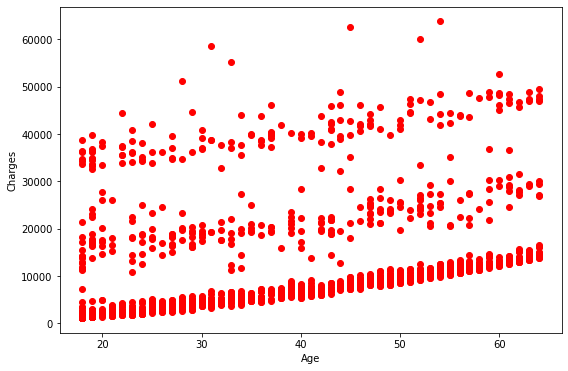

In [662]:
fig, ax = plt.subplots(figsize=(9,6))
x = insurance1['age']
y = insurance1[target]
ax.scatter(x,y, color = 'red')
ax.set_xlabel('Age')
ax.set_ylabel('Charges')
plt.show()

**Obliczmy średni koszt dla danego wieku**


In [663]:
mean_age = insurance1.groupby(['age'], as_index = False).mean()
mean_age.head(4)

age        bmi       charges
0   18  31.326159   7086.217556
1   19  28.596912   9747.909335
2   20  30.632759  10159.697736
3   21  28.185714   4730.464330

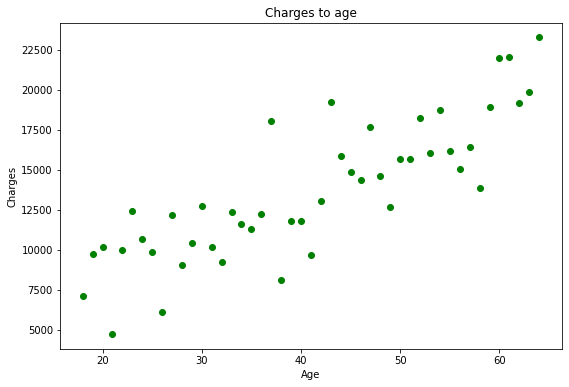

In [664]:
fig, ax = plt.subplots(figsize=(9,6))
x = mean_age['age']
y = mean_age[target]

ax.scatter(x,y, color='green')

ax.set_xlabel('Age')
ax.set_ylabel('Charges')
ax.set_title('Charges to age')

plt.show()


Śrenio wraz z wiekiem koszt lecznia zwiększa się

#### Porównanie kosztów leczenia w stosunku do BMI

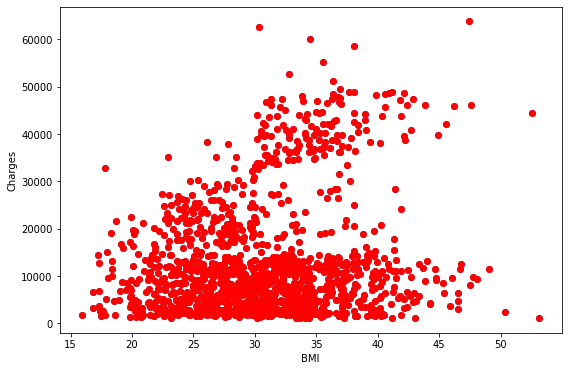

In [665]:
fig, ax = plt.subplots(figsize=(9,6))

x = insurance['bmi']
y = insurance[target]

ax.scatter(x,y)

ax.set_xlabel('BMI')
ax.set_ylabel('Charges')
ax.scatter(x,y, color='red')

plt.show()

**Obliczmy średni koszt na podstawie BMI**

In [666]:
mean_bmi = insurance1.groupby(['bmi'], as_index = False).mean()
mean_bmi.head(4)

bmi        age       charges
0  15.960  18.000000   1694.796400
1  16.815  29.500000   4904.000350
2  17.195  26.000000  14455.644050
3  17.290  27.666667   7813.353433

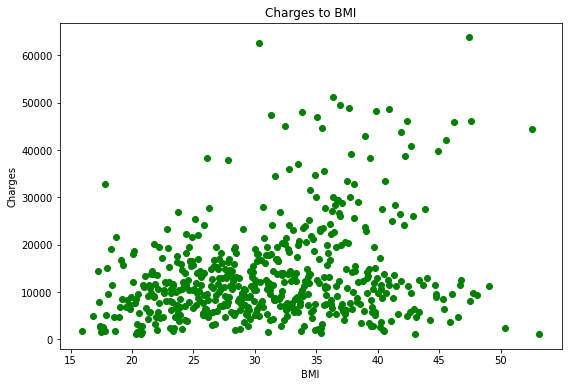

In [667]:
fig, ax = plt.subplots(figsize=(9,6))
x = mean_bmi['bmi']
y = mean_bmi[target]

ax.scatter(x,y, color='green')

ax.set_xlabel('BMI')
ax.set_ylabel('Charges')
ax.set_title('Charges to BMI')

plt.show()

### Koszty w stosunku do płci

Sprawdźmy jaką część obserwacji stanowią kobiety a jaką mężczyźni.


In [668]:
insurance1['sex'].value_counts(normalize = True)


male      0.505232
female    0.494768
Name: sex, dtype: float64


Kobiety to 49,5% 

Mężczyźni 50.5% 

Porównajmy koszty leczenia kobiet i mężczyzn.

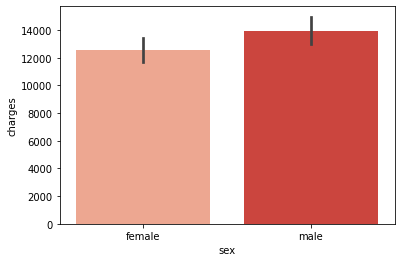

In [669]:
sns.barplot(x = 'sex', y = 'charges', data = insurance1, palette = 'Reds')
plt.show()

### Koszty leczenia pogrupowane na podstawie tego czy ktoś jest palczem czy nie.

In [670]:
def groupby_columns(dataframe, column):
    groupby = dataframe.groupby(column)
    return {x: groupby.get_group(x) for x in groupby.groups}

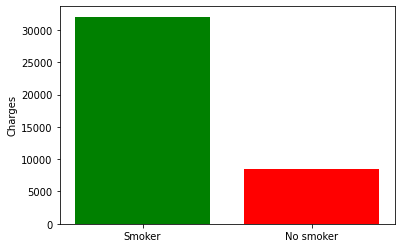

In [671]:
charges_if_smoker = groupby_columns(insurance1, 'smoker')

fig, ax = plt.subplots()
ax.bar('Smoker', charges_if_smoker['yes'][target].mean(), color='green')
ax.bar('No smoker', charges_if_smoker['no'][target].mean(), color = 'red')
ax.set_ylabel('Charges')
plt.show()

Na wykresie powyżej możemy zaobserować dużą różnicę kosztów leczenie pomiędzy osobą palącą a nie palącą.

**Porównajmy koszty liczenia dla osób palących/nie palących z pogrupowaniem na płeć**

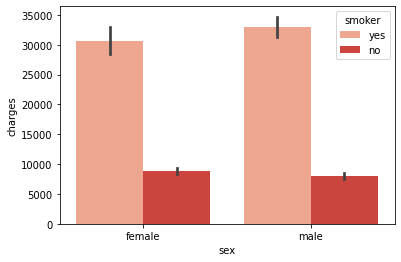

In [672]:
sns.barplot(x = 'sex', y = target, hue = 'smoker', data = insurance1, palette = "Reds")
plt.show()

### Standaryzacja

Zamieńmy płeć oraz informację czy dana osoba pali na wartości binarne.

Przygotujmy standaryzację BMI oraz wieku.

In [673]:
insurance1 = pd.concat([insurance1, pd.get_dummies(insurance1['smoker'], drop_first = True, prefix='smoker')], axis = 1)

insurance1 = pd.concat([insurance1, pd.get_dummies(insurance1['sex'], drop_first = True)], axis = 1)

insurance1.drop(['smoker'], axis = 1, inplace = True)

insurance1.drop(['sex'], axis = 1, inplace = True)

In [674]:
insurance1.head(4)

age     bmi      charges  smoker_yes  male
0   19  27.900  16884.92400           1     0
1   18  33.770   1725.55230           0     1
2   28  33.000   4449.46200           0     1
3   33  22.705  21984.47061           0     1

In [675]:
data_prepared = insurance1.copy()

In [676]:
data_prepared['age_std'] = (data_prepared['age'] - data_prepared['age'].mean()) / data_prepared['age'].std()
data_prepared.head(3)

age    bmi     charges  smoker_yes  male   age_std
0   19  27.90  16884.9240           1     0 -1.438227
1   18  33.77   1725.5523           0     1 -1.509401
2   28  33.00   4449.4620           0     1 -0.797655

In [677]:
data_prepared['bmi_std'] = (data_prepared['bmi'] - data_prepared['bmi'].mean()) / data_prepared['bmi'].std()
data_prepared.head(3)

age    bmi     charges  smoker_yes  male   age_std   bmi_std
0   19  27.90  16884.9240           1     0 -1.438227 -0.453151
1   18  33.77   1725.5523           0     1 -1.509401  0.509431
2   28  33.00   4449.4620           0     1 -0.797655  0.383164

In [678]:
final_data = data_prepared.copy()
final_data.drop(['age', 'bmi'], axis = 1, inplace = True)
final_data.head(3)

charges  smoker_yes  male   age_std   bmi_std
0  16884.9240           1     0 -1.438227 -0.453151
1   1725.5523           0     1 -1.509401  0.509431
2   4449.4620           0     1 -0.797655  0.383164

### Podział danych na numeryczne i kategoryczne:

In [679]:
numeric_features = ['age_std', 'bmi_std']
categorical_features = ['male', 'smoker_yes']

target = 'charges'

### Wykres skrzypcowy dla zmiennych kategorycznych

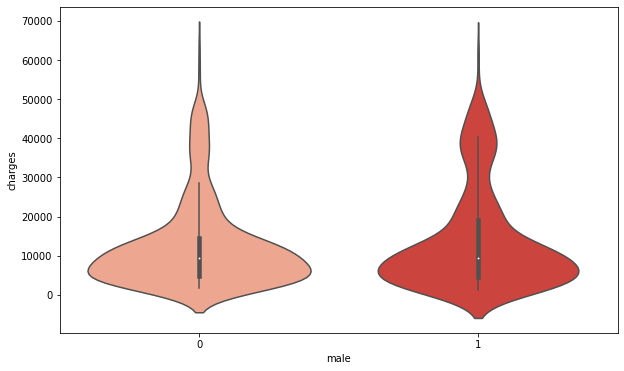

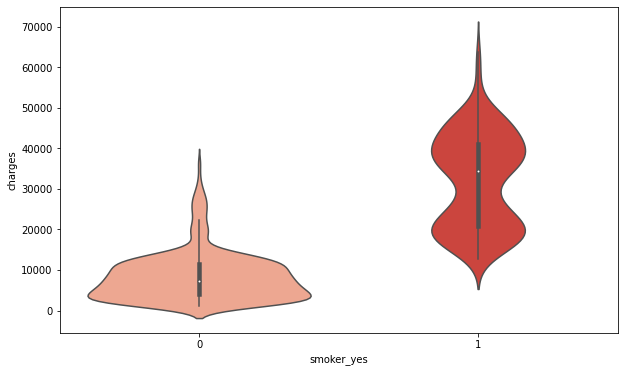

In [680]:
for categorical_feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.violinplot(y=final_data[target], x=final_data[categorical_feature], palette = 'Reds')
    plt.show()

###Macierz korelacji dla zmiennych numerycznych 

<function matplotlib.pyplot.show>

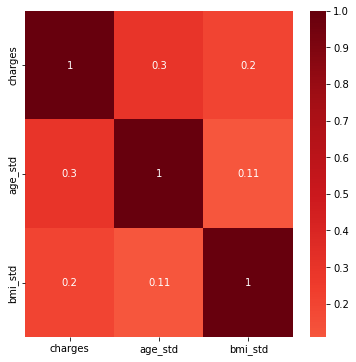

In [681]:
plt.figure(figsize=(6,6))
ax = sns.heatmap(final_data[[target]+numeric_features].corr(), cmap='Reds', center=0, annot=True)
plt.show

## Regresja liniowa wielu zmiennych

In [682]:
from sklearn.linear_model import LinearRegression

In [683]:
X = final_data.drop([target], axis=1)
display(X.iloc[:3])

y = final_data[target]
display(y.iloc[:3])

smoker_yes  male   age_std   bmi_std
0           1     0 -1.438227 -0.453151
1           0     1 -1.509401  0.509431
2           0     1 -0.797655  0.383164

0    16884.9240
1     1725.5523
2     4449.4620
Name: charges, dtype: float64

Dzielenie zbioru na Train (X_train i y_train) oraz Test (X_test i y_test).

In [684]:
from sklearn.model_selection import train_test_split

In [685]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)


In [686]:
print(f'X.shape: {X.shape}, y.shape: {y.shape}')
print()
print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}')

X.shape: (1338, 4), y.shape: (1338,)

X_train.shape: (1070, 4), y_train.shape: (1070,)
X_test.shape: (268, 4), y_test.shape: (268,)


In [687]:
1070+268


1338

## Zbiór walidacyjny

Wydzielenie ze zbioru Train zbiór Valid.
Chcemy aby zbiór walidacyjny stanowił kolejne 0.2 zbioru, a zatem musimy wydzielić ze zbioru treningowego 0.25, ponieważ 0.25 x 0.8 = 0.2.

In [688]:
X_train_small, X_val, y_train_small, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2022)

In [689]:
print(f'X.shape: {X.shape}, y.shape: {y.shape}')
print()
print(f'X_train_small.shape: {X_train_small.shape}, y_train_small.shape: {y_train_small.shape}')
print(f'X_val.shape: {X_val.shape}, y_val.shape: {y_val.shape}')
print(f'X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}')

X.shape: (1338, 4), y.shape: (1338,)

X_train_small.shape: (802, 4), y_train_small.shape: (802,)
X_val.shape: (268, 4), y_val.shape: (268,)
X_test.shape: (268, 4), y_test.shape: (268,)


In [690]:
802+268+268

1338

##Sprawdzian krzyżowy

In [691]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [692]:
from sklearn.model_selection import KFold

In [693]:
X_train.shape

(1070, 4)

In [694]:
cv = KFold(n_splits=5, shuffle=True, random_state=2022)

for train, val in cv.split(X_train, y_train):
    X_tr, y_tr = X_train.iloc[train], y_train.iloc[train]
    X_val, y_val = X_train.iloc[val], y_train.iloc[val]
    print(f'X_tr.shape: {X_tr.shape}, X_val.shape: {X_val.shape}')
    print(X_tr.shape[0]+X_val.shape[0])

X_tr.shape: (856, 4), X_val.shape: (214, 4)
1070
X_tr.shape: (856, 4), X_val.shape: (214, 4)
1070
X_tr.shape: (856, 4), X_val.shape: (214, 4)
1070
X_tr.shape: (856, 4), X_val.shape: (214, 4)
1070
X_tr.shape: (856, 4), X_val.shape: (214, 4)
1070


## Ocena regrsji

In [695]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [696]:
y_predict_train = lr_model.predict(X_train)
y_predict_test = lr_model.predict(X_test)

### Model Baseline

In [697]:
from sklearn.dummy import DummyRegressor

dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)

DummyRegressor()

In [698]:
y_train_dummy = dummy_model.predict(X_train)
y_test_dummy = dummy_model.predict(X_test)

In [699]:
y_test_dummy[:5]

array([13398.57868959, 13398.57868959, 13398.57868959, 13398.57868959,
       13398.57868959])

In [700]:
y_predict_test[:5]

array([ 8427.09209465,  4855.37139284, 10207.56116283,  8808.05544397,
       12808.32677704])

### Współczynnik determinacji

Sprawdzenie jaka część zmienności y wyjaśnia nasz model.

In [701]:
from sklearn.metrics import r2_score

In [702]:
print(f'Dummy Train R^2: {r2_score(y_train, y_train_dummy)}') # kolejność jest istotna, najpierw prawdziwe, potem prognozy
print(f'RL Model Train R^2: {r2_score(y_train, y_predict_train)}')

Dummy Train R^2: 0.0
RL Model Train R^2: 0.7344562120974707


Nasz model wyjaśnia 73,5% zmienności y.

### MAE

MAE (Mean Absolute Error) mierzy średnią różnicę pomiędzy wartościami przewidzianymi a rzeczywistymi. Najpierw liczymy różnicę między predykcją a wartością rzeczywistą, bierzemy z tego wartość absolutną, sumujemy dla wszystkich przykładów, a następnie dzielimy przez ich liczbę.

In [703]:
from sklearn.metrics import mean_absolute_error

print('Train')
print(f'Dummy: {mean_absolute_error(y_train, y_train_dummy)}')
print(f'RL Model: {mean_absolute_error(y_train, y_predict_train)}')
print('\nTest:')
print(f'Dummy: {mean_absolute_error(y_test, y_test_dummy)}')
print(f'RL Model: {mean_absolute_error(y_test, y_predict_test)}')

Train
Dummy: 9172.631949962091
RL Model: 4336.5275176931455

Test:
Dummy: 9004.29746646955
RL Model: 3799.7553781147785


In [704]:
(3799-4336)/(4336)

-0.12384686346863469

### MAPE

MAPE (Mean Absolute Percentage Error) mierzy procentową wartość błędu predykcji. Po obliczeniu różnicy między wartość prawdziwą a przewidzianą, dzielimy tę wartość przez wartość prawdziwą, a następnie z tego bierzemy wartość bezwzględną.

In [705]:
from sklearn.metrics import mean_absolute_percentage_error

print('Test:')
print(f'Dummy: {mean_absolute_percentage_error(y_test, y_test_dummy)*100}%')
print(f'RL Model: {mean_absolute_percentage_error(y_test, y_predict_test)*100}%')

Test:
Dummy: 160.6775952090012%
RL Model: 42.9489962883901%


### MSE

MSE (Mean Squared Error) podobnie jak MAE będzie skupiała się bardziej na dużych błędach. Najpierw liczymy różnicę między predykcją, a wartością rzeczywistą, podnosimy do kwadratu, sumujemy dla wszystkich przykładów, a następnie dzielimy przez ich liczbę.

In [706]:
from sklearn.metrics import mean_squared_error

mse_dummy = mean_squared_error(y_test, y_test_dummy)
mse_model = mean_squared_error(y_test, y_predict_test)

print('Test')
print(f'Dummy MSE: {mse_dummy}')
print(f'RL Model MSE: {mse_model}')


Test
Dummy MSE: 144178448.72444746
RL Model MSE: 28885389.72080925


### RMSE

RMSE (Root Mean Squared Error) to pierwiastek kwadratowy z MSE

In [707]:
from math import sqrt

print('Test:')
print(f'Dummy RMSE: {sqrt(mse_dummy)}')
print(f'RL Model RMSE: {sqrt(mse_model)}')

Test:
Dummy RMSE: 12007.433061418558
RL Model RMSE: 5374.512975220104


In [708]:
mean_squared_error(y_test, y_predict_test, squared=False)

5374.512975220104

### Wizualizacyjna ocena modelu

#### Porównanie wartości prawdziwej z predykcją

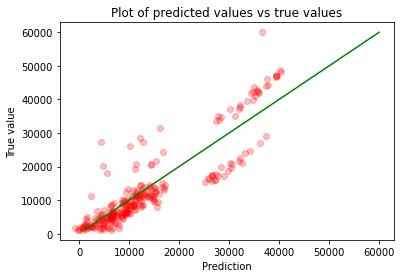

In [717]:
plt.scatter(x = y_predict_test, y = y_test, alpha=0.25, color = 'r')

xmin, xmax = y_test.min(), y_test.max()
x_line = np.linspace(xmin, xmax, 10)
y_line = x_line
# Oczekiwania
plt.plot(x_line, y_line, 'g-')

plt.xlabel('Prediction')
plt.ylabel('True value')
plt.title('Plot of predicted values vs true values')
plt.show()

#### Wykres reszt

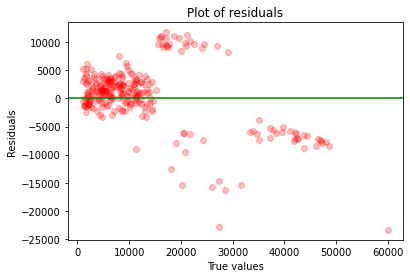

In [710]:
errors = y_predict_test - y_test
plt.scatter(x = y_test, y= errors, alpha=0.25, color='r')
plt.axhline(0, color='g', linestyle='-')
plt.xlabel('True values')
plt.ylabel('Residuals')
plt.title('Plot of residuals')
plt.show()

#### Histogram reszt

Error mean: 449.66312522934555


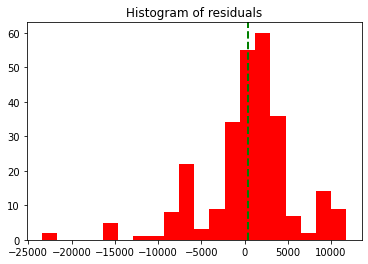

In [711]:
print(f'Error mean: {errors.mean()}')

plt.hist(errors, bins=20, color='red')
plt.axvline(errors.mean(), color='g', linestyle='dashed', linewidth=2)
plt.title('Histogram of residuals')
plt.show()

## Bias–variance tradeoff

In [712]:
from sklearn.preprocessing import PolynomialFeatures

In [716]:
rmse_train_list = []
rmse_test_list = []
degree_list = []

for degree in [1, 2, 3, 4, 5, 6]:
    poly_transformer = PolynomialFeatures(degree=degree)
    X_train_transformed = poly_transformer.fit_transform(X_train)
    polynomial_regression = LinearRegression() 
    polynomial_regression.fit(X_train_transformed, y_train)
    
    prediction_train = polynomial_regression.predict(X_train_transformed)
    r_2_result = r2_score(y_train, prediction_train)
    print(f'Degree: {degree}, R^2: {np.round(r_2_result, 2)}')
    
    X_test_transformed = poly_transformer.transform(X_test)
    prediction_test = polynomial_regression.predict(X_test_transformed)
    
    rmse_train_list.append(sqrt(mean_squared_error(y_train, prediction_train)))
    rmse_test_list.append(sqrt(mean_squared_error(y_test, prediction_test)))
    degree_list.append(degree)

Degree: 1, R^2: 0.73
Degree: 2, R^2: 0.83
Degree: 3, R^2: 0.83
Degree: 4, R^2: 0.84
Degree: 5, R^2: 0.85
Degree: 6, R^2: 0.85


In [714]:
rmse_train_list

[6251.097970103157,
 5010.613037164467,
 4956.803696404178,
 4842.517101212547,
 4734.054827707044,
 4676.435932641302]

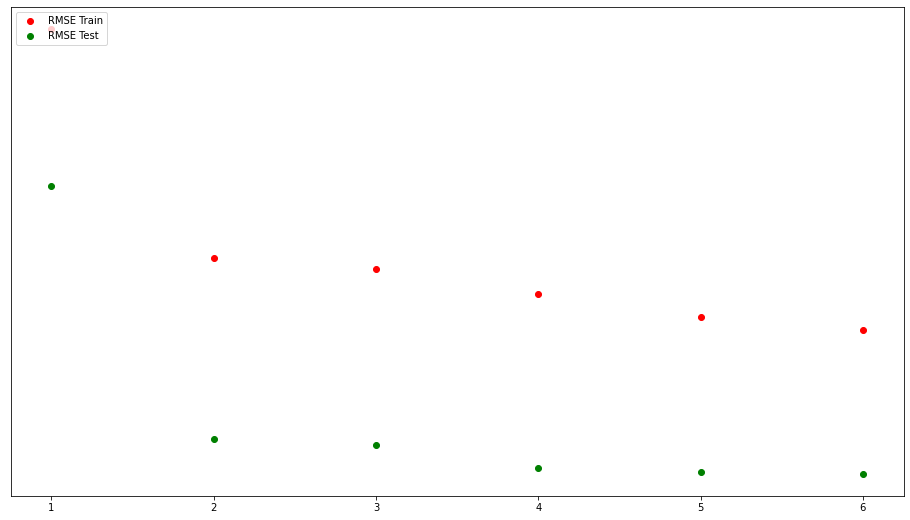

In [715]:
plt.figure(figsize=(16, 9))
plt.scatter(np.array(degree_list), np.array(rmse_train_list), label='RMSE Train', color = 'red')
plt.scatter(np.array(degree_list), np.array(rmse_test_list), label='RMSE Test', color = 'green')
plt.yscale('symlog')
plt.legend(loc='upper left')
plt.show()